import library ที่จำเป็นในการพัฒนาโมเดล
  - numpy ใช้เพื่อจัดการข้อมูล
  - tensorflow ใช้เพื่อพัฒนาโมเดล
  - pandas ใช้การวิเคราะห์และจัดการข้อมูล (proprocessing)
  - seaborn ใช้แสดงผลกราฟ

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.0 MB 136 kB/s
     |████████████████████████████████| 102 kB 25.0 MB/s 
     |████████████████████████████████| 690 kB 46.2 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 9.9 MB 45.0 MB/s 
     |████████████████████████████████| 4.7 MB 49.2 MB/s 
     |████████████████████████████████| 296 kB 49.9 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.4.0-py2.py3-none-any.whl size=315269 sha256=932b9f9c563739c53ef9dd0f1d7686038fb7810c8644ea4e775894953184d7d0
  Stored in directory: /tmp/pip-ephem-wheel-cache-3r5zidsh/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=e981bce5d0a3196c285e868a8cef3f7fd538d064dd4b840053340ab3ffe33c8a
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba86876882394

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

นำเข้าข้อมูล
[Mobile Price Classification](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification) จาก Kaggle

In [ ]:
df = pd.read_csv('/content/train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


**ทำ Exploratory Data Analysis (EDA) เพื่อดูข้อมูล**

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


ดู data type แต่ละคอลัมน์

In [ ]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

ดูค่าที่เป็นไปได้ในแต่ละ feature

In [ ]:
for col in df.columns[:-1]:
  print(col," ",df[col].unique())

battery_power   [ 842 1021  563 ... 1139 1467  858]
blue   [0 1]
clock_speed   [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
dual_sim   [0 1]
fc   [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
four_g   [0 1]
int_memory   [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
m_dep   [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
mobile_wt   [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 175  86
  98 125 

In [ ]:
cat_cols = ['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi']

In [ ]:
con_cols = list(filter(lambda c: c not in cat_cols,df.columns[:-1]))
con_cols

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

ใช้ Histrogram เพื่อดูแนวโน้มข้อมูลและหาความผิดปกติของข้อมูล (outlier)

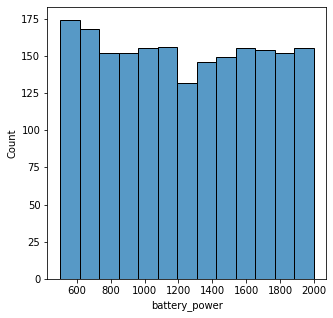

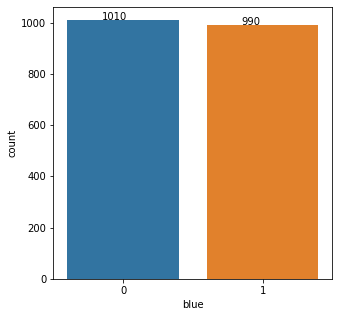

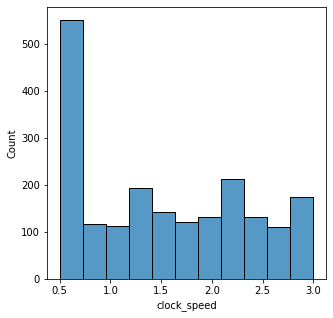

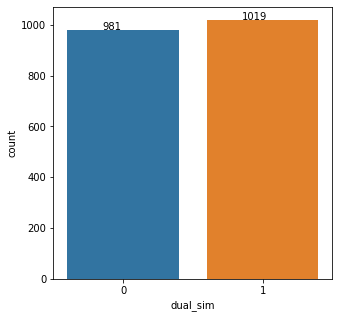

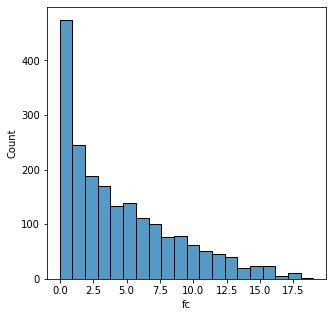

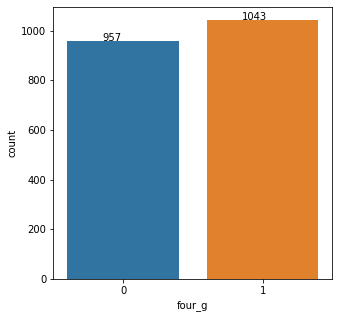

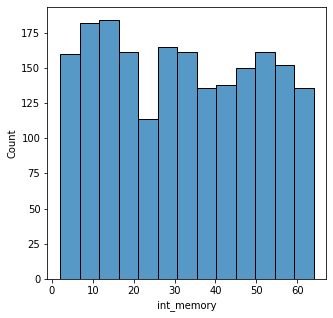

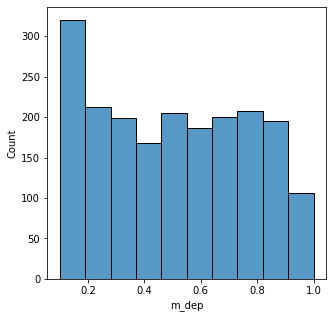

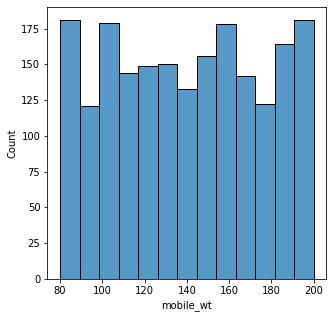

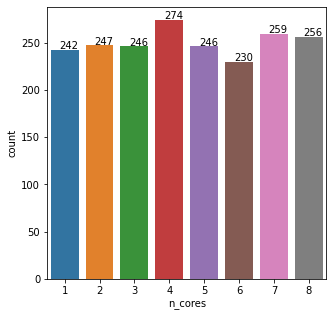

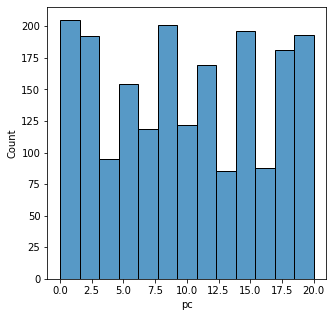

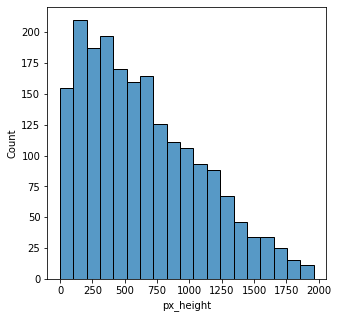

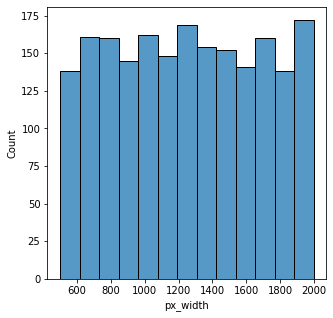

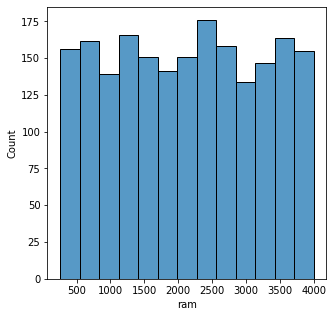

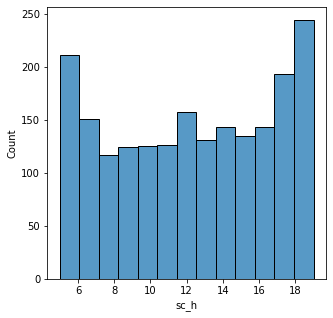

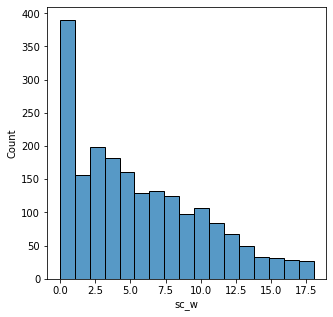

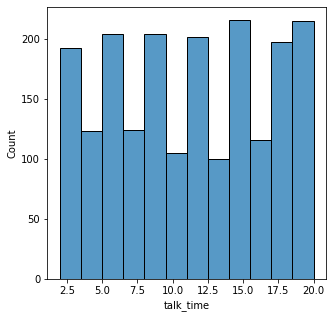

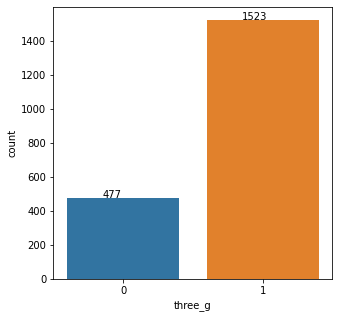

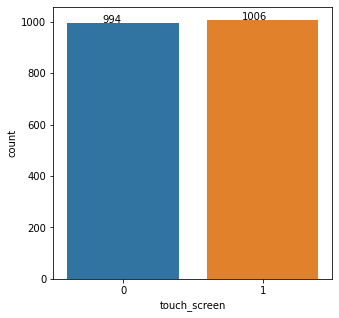

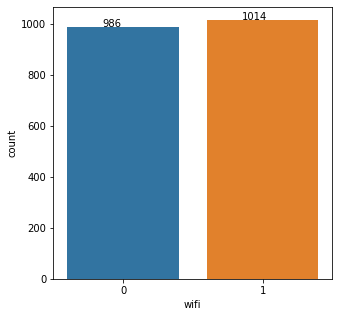

In [ ]:
for col in df.columns[:-1]:
  df1 = df[col]
  fig = plt.figure(figsize=(5,5))
  if col in cat_cols :
    #df1 = df1.replace({1:True,0:False})
    ax = sns.countplot(x=df1)
    for p in ax.patches:
      ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1))
  else:
    iqr =  df1.quantile(0.75) - df1.quantile(0.25)
    bin_width = (2 * iqr) / (len(df1) ** (1 / 3))
    bin_count = int(np.ceil((df1.max() - df1.min()) / bin_width))
    sns.histplot(x=df1,bins=bin_count)

  '''
    print(col, " : bin size :",bin_count)
    print("min : ",min(frequence_arr))
    print("max : ",max(frequence_arr))
    print(frequence_arr)
    '''


  '''
    print("min bin : ",bin_arr[0][0])
    print("max bin : ",bin_arr[len(bin_arr) - 1][1])
    print("min : ",df1.min())
    print("max : ",df1.max())'''
    #print("----------------------------")



ใช้ pandas_profiling เพื่อช่วยสำรวจข้อมูล

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile

จากการวิเคราะห์ข้อมูล พบว่า
  - dataset นี้ไม่มีค่าว่าง (missing values)
  - แต่ละ label มีจำนวนที่เหมาะสม (balanced Data)
  - มีข้อมูลที่ไม่สมเหตุสมผล คือ ข้อมูลในคอลัมน์ sc_w (ความกว้างหน้าจอ) บางแถวมีข้อมูลเป็น 0 ด้วย

**Cleaning data**

ลบแถวที่ข้อมูลใน sc_w เป็น 0

In [ ]:
df = df[df['sc_w'] > 0]

**Transform data**

scale ข้อมูล feature และ encode label

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
scaler = MinMaxScaler()
encoder = OneHotEncoder()
y = np.array(pd.get_dummies(df['price_range']))
df_scaled = df.drop('price_range', axis=1)
df_scaled = scaler.fit_transform(df_scaled)

In [ ]:
df_scaled

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
y

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

แบ่งข้อมูลเพื่อ train และ test โมเดล

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_scaled,y, test_size=0.2, random_state=555)

**Build model**

ใช้ keras เพื่อพัฒนาโมเดลแบบ feed forward

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD

สร้างโมเดล ทีมีรายละเอียดดังนี้
  - input layer จำนวน 20 node
  - hidden layer 1 layer จำนวน 40 node ใช้ activation function เป็น relu
  - output layer จำนวน 4 node ใช้ activation function เป็น softmax

In [ ]:
model = Sequential()
model.add(Input(shape=(None,20),name="input"))
model.add(Dense(40,activation='relu',name="hidden1"))
model.add(Dense(4,activation='softmax',name="output"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, None, 40)          840       
                                                                 
 output (Dense)              (None, None, 4)           164       
                                                                 
Total params: 1,004
Trainable params: 1,004
Non-trainable params: 0
_________________________________________________________________


โมเดลนี้
  - ใช้ optimizer เป็น stochastic gradient descent (SGD) ที่ใช้ learning rate = 0.05
  - ใช้ categorical cross entropy เป็น loss function
  - train จำนวน 100 epochs

In [ ]:
sgd = SGD(learning_rate=0.05)
model.compile(
    optimizer= sgd,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history_model = model.fit(x_train,y_train,epochs=100,verbose=1)

Epoch 1/100


46/46 [==============================] - 1s 4ms/step - loss: 1.3801 - accuracy: 0.3166
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 1.3252 - accuracy: 0.3997
Epoch 3/100
46/46 [==============================] - 0s 6ms/step - loss: 1.2650 - accuracy: 0.4650
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 1.1946 - accuracy: 0.5165
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 1.1145 - accuracy: 0.5707
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 1.0328 - accuracy: 0.6202
Epoch 7/100
46/46 [==============================] - 0s 4ms/step - loss: 0.9552 - accuracy: 0.6607
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8885 - accuracy: 0.7033
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8298 - accuracy: 0.7225
Epoch 10/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7804 - accuracy: 0.7596
Epoch 11/100
46/46 [=

In [ ]:
model.evaluate(x_test, y_test)

12/12 [==============================] - 0s 3ms/step - loss: 0.1760 - accuracy: 0.9423


[0.17597323656082153, 0.942307710647583]

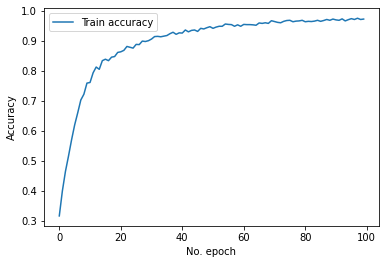

In [ ]:
plt.plot(history_model.history['accuracy'], label='Train accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

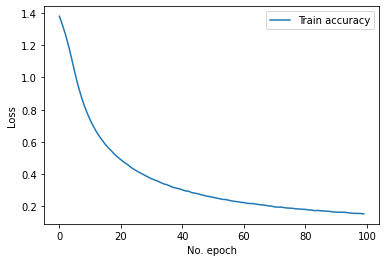

In [ ]:
plt.plot(history_model.history['loss'], label='Train accuracy')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

**Evaluation**

In [ ]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
predict = model.predict(x_test) > 0.5

12/12 [==============================] - 0s 5ms/step


In [ ]:
def get_true_index(l):
  list_ = l.tolist()
  for i in range(len(list_)):
    if list_[i] == True:
      return i

In [ ]:
actual_arr = []
predicted_arr = []

for i in range(len(predict)):
  actual_arr.append(get_true_index(y_test[i]))
  predicted_arr.append(get_true_index(predict[i]))

[Text(41.99999999999999, 0.5, 'Predict'), Text(0.5, 42.0, 'Actual')]

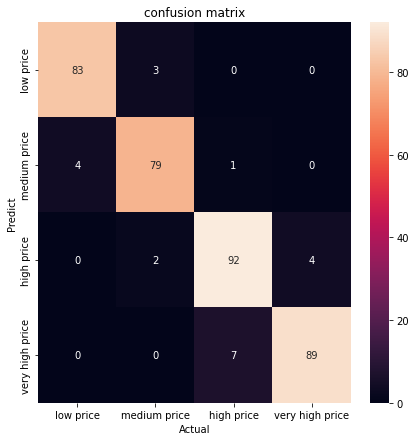

In [ ]:
from mlxtend.evaluate import confusion_matrix

labels = ['low price','medium price','high price','very high price']
cfmx = confusion_matrix(actual_arr,predicted_arr)
fig = plt.figure(figsize=(7,7))

plt.title('confusion matrix')
sns.heatmap(cfmx,annot=True,yticklabels=labels,xticklabels=labels).set(xlabel='Actual', ylabel='Predict')

In [ ]:
print("Accuracy : {:.3f} %".format(accuracy_score(y_test,predict)*100))
print("Precision : {:.3f} %".format(precision_score(y_test,predict,average='micro')*100))
print("Recall : {:.3f} %".format(recall_score(y_test,predict,average='micro')*100))
print("F1-Score : {:.3f} %".format(f1_score(y_test,predict,average='micro')*100))

Accuracy : 94.231 %
Precision : 94.231 %
Recall : 94.231 %
F1-Score : 94.231 %
